In [1]:
def split(mat):
    m = len(mat)
    n = len(mat[0])
    return mat[:m//2, :n//2], mat[:m//2, n//2:], mat[m//2:, :n//2], mat[m//2:, n//2:]

In [2]:
def strassen(mat_1, mat_2):
    if(len(mat_1) == 1):
        return mat_1 * mat_2
    a11, a12, a21, a22 = split(mat_1)
    b11, b12, b21, b22 = split(mat_2)
    p = strassen(a11, b12 - b22)
    q = strassen(a11 + a12, b22)
    r = strassen(a21 + a22, b11)
    s = strassen(a22, b21 - b11)
    t = strassen(a11 + a22, b11 + b22)
    u = strassen(a12 - a22, b21 + b22)
    v = strassen(a11 - a21, b11 + b12)

    c11 = t + s - q + u
    c12 = p + q
    c21 = r + s
    c22 = p + t - r - v
    return np.vstack((np.hstack((c11, c12)), np.hstack((c21, c22))))


In [3]:
import numpy as np

In [4]:
def matrixmul(m1, m2):
    r , c = m1.shape[1], m2.shape[0]
    res = np.zeros((r,c))
    for i in range(m1.shape[0]):
        for j in range(m2.shape[1]):
            for k in range(m2.shape[0]):
                res[i][j] += (m1[i][k] * m2[k][j])
    return res

In [5]:
mat_1 =np.array([[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4]])
mat_2 = np.array([[2,2,2,2],[3,3,3,3],[4,4,4,4],[5,5,5,5]])
print(strassen(mat_1, mat_2))

[[14 14 14 14]
 [28 28 28 28]
 [42 42 42 42]
 [56 56 56 56]]


In [6]:
mat_1 =np.array([[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4]])
mat_2 = np.array([[2,2,2,2],[3,3,3,3],[4,4,4,4],[5,5,5,5]])
print(matrixmul(mat_1, mat_2))

[[14. 14. 14. 14.]
 [28. 28. 28. 28.]
 [42. 42. 42. 42.]
 [56. 56. 56. 56.]]


In [ ]:
import timeit
import time
import pandas as pd


In [8]:
ans = {'stressan_time':[], 'matrix_mul_time': []}
for i in range(10):
    mat_1 = np.random.rand(2**(i+1), 2**(i+1))
    mat_2 = np.random.rand(2**(i+1), 2**(i+1))
    start = time.time_ns()
    strassen(mat_1,mat_2)
    end = time.time_ns()
    ans['stressan_time'].append(end-start)
    start = time.time_ns()
    matrixmul(mat_1,mat_2)
    end = time.time_ns()
    ans['matrix_mul_time'].append(end-start)

KeyboardInterrupt: 

In [ ]:
# 2nd run
strassen_ans = ans.copy()


In [20]:
strassen_ans = ans.copy()

In [30]:
df = pd.DataFrame(ans)

<AxesSubplot:>

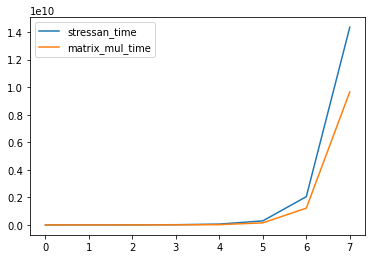

In [32]:
df.plot()

In [31]:
df

,stressan_time,matrix_mul_time
0,352000,76000
1,893000,182000
2,3883000,856000
3,15375000,4408000
4,60286000,20154000
5,292918000,149373000
6,2050312000,1216795000
7,14346779000,9654632000
